## Observations and Insights 

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouseData = pd.read_csv(mouse_metadata_path)
studyResults = pd.read_csv(study_results_path)




In [8]:
mouseData.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [9]:
studyResults.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [12]:
# Combine the data into a single dataset
data_df = pd.merge(mouseData, studyResults, how='outer', on='Mouse ID')
# Display the data table for preview
data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [14]:
# Checking the number of mice.
# data_df['Mouse ID'].value_counts()
mouseCount = len(data_df['Mouse ID'].unique())
mouseCount

249

In [18]:
totalCount = len(data_df['Mouse ID'])
totalCount

1893

In [27]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dups = data_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
dups_df = pd.DataFrame(dups)
dups_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [33]:
totalNewCount = len(dups_df['Mouse ID'])
totalNewCount

1888

In [38]:
data_df['Mouse ID'].value_counts()

g989    13
j119    10
g296    10
b559    10
j984    10
        ..
b447     1
t573     1
x226     1
l872     1
h428     1
Name: Mouse ID, Length: 249, dtype: int64

In [37]:
dups_df['Mouse ID'].value_counts()

j119    10
g296    10
b559    10
j984    10
c766    10
        ..
u153     1
x336     1
h428     1
n482     1
x226     1
Name: Mouse ID, Length: 249, dtype: int64

## Summary Statistics

In [46]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
    # Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
    # mean, median, variance, standard deviation, and SEM of the tumor volume. 
    # Assemble the resulting series into a single summary dataframe.
groupDrug_df = dups_df.groupby('Drug Regimen')
tumVol_mean = groupDrug_df['Tumor Volume (mm3)'].mean()
tumVol_median = groupDrug_df['Tumor Volume (mm3)'].median()
tumVol_stddev = groupDrug_df['Tumor Volume (mm3)'].std()
tumVol_var = tumVol_stddev*tumVol_stddev
tumVol_SEM = groupDrug_df['Tumor Volume (mm3)'].sem()

summaryTable = pd.DataFrame({"Mean" : tumVol_mean, "Median" : tumVol_median,"Variance" : tumVol_var,"Std Dev" : tumVol_stddev,"SEM" : tumVol_SEM})
summaryTable

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [57]:
# Using the aggregation method, produce the same summary statistics in a single line
agg_by = dups_df.groupby('Drug Regimen')
agg_df = agg_by.agg(['mean','median','var','std','sem'])['Tumor Volume (mm3)']
agg_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:title={'center':'Number of Measurements per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Measurements'>

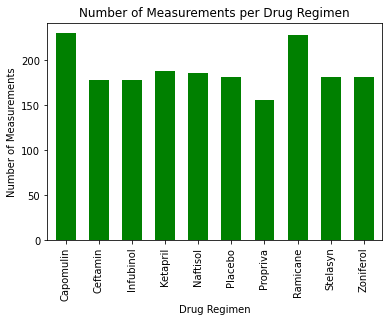

In [104]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drugTM = dups_df.groupby(['Drug Regimen']).count()['Mouse ID']

Bar_pandas = drugTM.plot.bar(width = 0.6, color = 'g')
Bar_pandas.set_title("Number of Measurements per Drug Regimen")
Bar_pandas.set_xlabel("Drug Regimen")
Bar_pandas.set_ylabel("Number of Measurements")
Bar_pandas

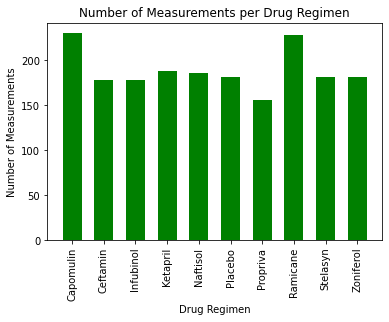

In [105]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(drugTM))
plt.bar(x_axis, drugTM, width = 0.6, color = 'g')

drugNames = [value for value in x_axis]
plt.xticks(drugNames, drugTM.index.values)
plt.xticks(rotation=90)
plt.title("Number of Measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.show()

In [128]:
sexes_by = dups_df.groupby(['Mouse ID', 'Sex'])
sexes_df = pd.DataFrame(sexes_by.size())
sexes_df

,,0
Mouse ID,Sex,
a203,Female,10
a251,Female,10
a262,Female,10
a275,Female,10
a366,Female,7
...,...,...
z435,Female,3
z578,Male,10
z581,Female,10


In [137]:
sexCount = sexes_df.groupby(['Sex']).count()
sexdf = pd.DataFrame(sexCount)
sexdf.columns = ["Count"]
sexdf["Percentage"] = sexdf['Count']/sexdf['Count'].sum()
sexdf

,Count,Percentage
Sex,,
Female,124,0.497992
Male,125,0.502008


<AxesSubplot:title={'center':'Female vs. Male'}>

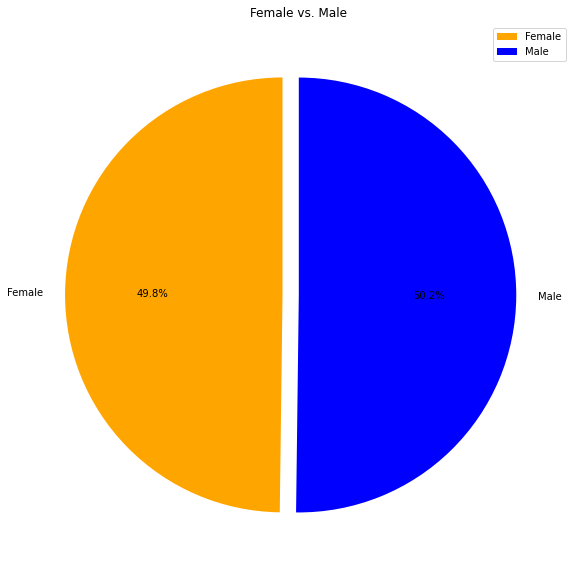

In [168]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
explode = (0.075,0)
colors = ('orange','blue')
Pie_pandas = sexdf.plot.pie(y = 'Count', startangle=90, explode = explode, autopct = "%1.1f%%",colors=colors,figsize = (10,10))
Pie_pandas.set_title("Female vs. Male")
Pie_pandas.set_ylabel("")
Pie_pandas

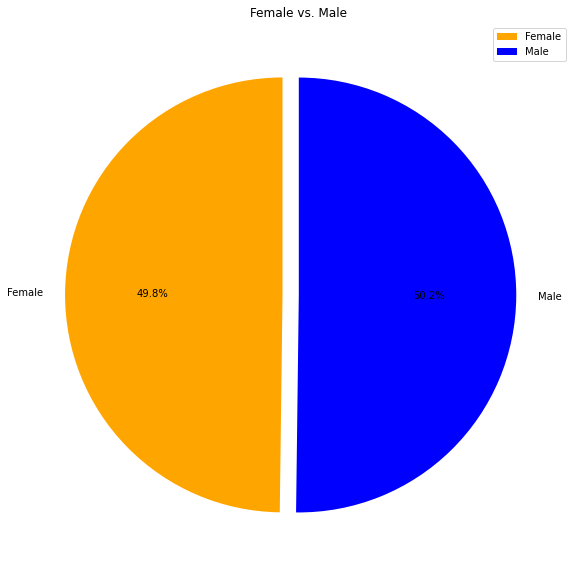

In [170]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
explode = (0.075,0)
colors = ('orange','blue')
labels = ["Female", "Male"]
fig1,az1 = plt.subplots(figsize=(10,10))
plt.pie(sexdf['Count'], explode=explode, labels=labels,autopct="%1.1f%%",startangle=90,colors=colors)
plt.title("Female vs. Male")
plt.legend()
plt.show()

## Quartiles, Outliers and Boxplots

In [177]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Start by getting the last (greatest) timepoint for each mouse
maxTime_df = pd.DataFrame(dups_df.groupby('Mouse ID')['Timepoint'].max()).rename(columns={'Timepoint': "MaxTime"})
maxTime_df
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Tumor_df = pd.merge(dups_df, maxTime_df, on = 'Mouse ID')
Tumor_df

loc_df = Tumor_df.loc[Tumor_df['Timepoint'] == Tumor_df['MaxTime']]
loc_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,MaxTime
9,k403,Ramicane,Male,21,16,45,22.050126,1,45
19,s185,Capomulin,Female,3,17,45,23.343598,1,45
29,x401,Capomulin,Female,16,15,45,28.484033,0,45
39,m601,Capomulin,Male,22,17,45,28.430964,1,45
49,g791,Ramicane,Male,11,16,45,29.128472,1,45
...,...,...,...,...,...,...,...,...,...
1854,z314,Stelasyn,Female,21,28,5,45.934712,0,5
1857,z435,Propriva,Female,12,26,10,48.710661,0,10
1867,z581,Infubinol,Female,24,25,45,62.754451,3,45
1877,z795,Naftisol,Female,13,29,45,65.741070,3,45


In [200]:
# Put treatments into a list for for loop (and later for plot labels)
drugs
# Create empty list to fill with tumor vol data (for plotting)
tumorVol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes    
    # add subset 
    # Determine outliers using upper and lower bounds

for regimen in drugs:   
    
    sub_df = loc_df.loc[loc_df['Drug Regimen'] == regimen]
    finVol = sub_df.loc[sub_df['Timepoint'] == sub_df['MaxTime']]
    tumVol = finVol['Tumor Volume (mm3)']
    tumorVol_data.append(tumVol)
    
    quarts = tumVol.quantile([0.25,0.5,0.75])
    lowerq = quarts[0.25]
    upperq = quarts[0.75]
    IQR = upperq-lowerq
    lowerb = lowerq - (1.5*IQR)
    upperb = upperq + (1.5*IQR)
    print(f"The IQR for {regimen} is: {IQR}")
    print(f"     It's Upper Quartile is: {upperq}")
    print(f"     It's Lower Quartile is: {lowerq}")
    print(f"     It's Upper Bound is: {upperb}")
    print(f"     It's Lower Bound is: {lowerb}")
    
    upperOutlier = tumVol.loc[(finVol['Tumor Volume (mm3)'] > upperb)].count()
    lowerOutlier = tumVol.loc[(finVol['Tumor Volume (mm3)'] < lowerb)].count()
    Outliers = upperOutlier + lowerOutlier
    print(f"     Potential Outliers: {Outliers}")

The IQR for Capomulin is: 7.781863460000004
     It's Upper Quartile is: 40.1592203
     It's Lower Quartile is: 32.37735684
     It's Upper Bound is: 51.83201549
     It's Lower Bound is: 20.70456164999999
     Potential Outliers: 0
The IQR for Ramicane is: 9.098536719999998
     It's Upper Quartile is: 40.65900627
     It's Lower Quartile is: 31.56046955
     It's Upper Bound is: 54.30681135
     It's Lower Bound is: 17.912664470000003
     Potential Outliers: 0
The IQR for Infubinol is: 11.477135160000003
     It's Upper Quartile is: 65.52574285
     It's Lower Quartile is: 54.04860769
     It's Upper Bound is: 82.74144559000001
     It's Lower Bound is: 36.83290494999999
     Potential Outliers: 1
The IQR for Ceftamin is: 15.577752179999997
     It's Upper Quartile is: 64.29983003
     It's Lower Quartile is: 48.72207785
     It's Upper Bound is: 87.66645829999999
     It's Lower Bound is: 25.355449580000002
     Potential Outliers: 0


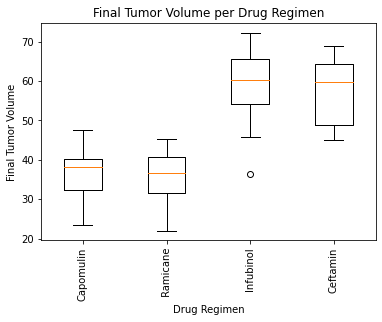

In [210]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumorVol_data)
plt.title("Final Tumor Volume per Drug Regimen")
plt.ylabel("Final Tumor Volume")
plt.xlabel("Drug Regimen")
plt.xticks([1,2,3,4],['Capomulin', ' Ramicane', 'Infubinol', 'Ceftamin'])
plt.xticks(rotation=90)
plt.show()

## Line and Scatter Plots

In [211]:
#Random Mouse ID with Capomulin: m601

m601 = dups_df.loc[dups_df['Mouse ID'] == 'm601']
m601

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
30,m601,Capomulin,Male,22,17,0,45.000000,0
31,m601,Capomulin,Male,22,17,5,41.408591,1
32,m601,Capomulin,Male,22,17,10,36.825367,1
33,m601,Capomulin,Male,22,17,15,35.464612,1
34,m601,Capomulin,Male,22,17,20,34.255732,1
35,m601,Capomulin,Male,22,17,25,33.118756,1
36,m601,Capomulin,Male,22,17,30,31.758275,1
37,m601,Capomulin,Male,22,17,35,30.834357,1
38,m601,Capomulin,Male,22,17,40,31.378045,1
39,m601,Capomulin,Male,22,17,45,28.430964,1


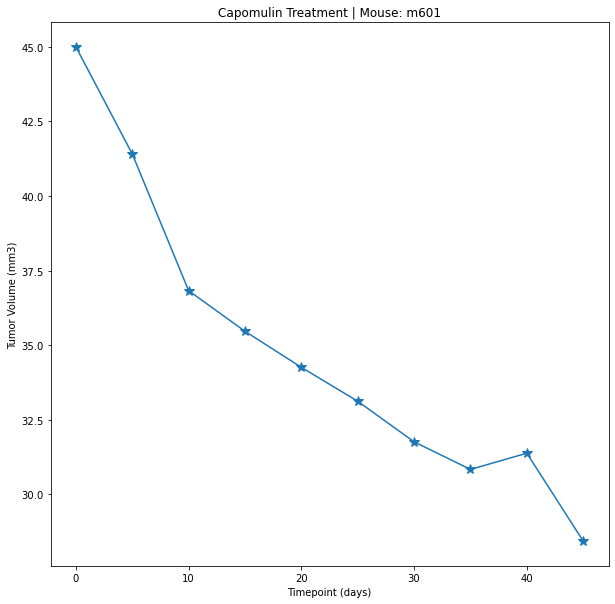

In [224]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x_axis1 = m601['Timepoint']
y_axis1 = m601['Tumor Volume (mm3)']

fig1, ax1 = plt.subplots(figsize = (10,10))

plt.plot(x_axis1, y_axis1,marker = '*', markersize = 10, linewidth = 1.5)
plt.title("Capomulin Treatment | Mouse: m601")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

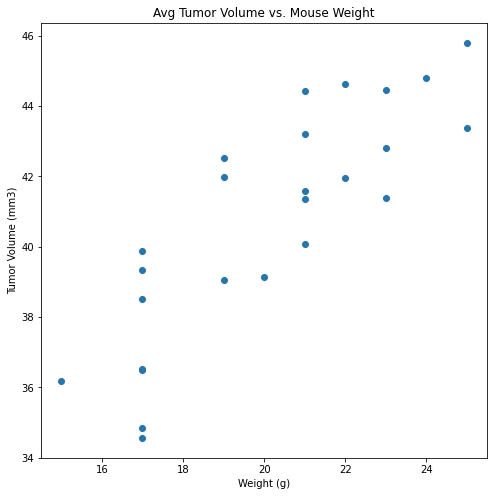

In [234]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_df = dups_df.loc[dups_df['Drug Regimen'] == 'Capomulin']
capo_df

avgz = capo_df.groupby(['Mouse ID']).mean()

x_axis2 = avgz['Weight (g)']
y_axis2 = avgz['Tumor Volume (mm3)']

fig1, ax1 = plt.subplots(figsize = (8,8))

plt.scatter(x_axis2, y_axis2)
plt.title("Avg Tumor Volume vs. Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
